# Visualizaciones promediadas anualmente

En este script veremos distintos gráficos con el objetivo de ver el comportamiento de las distintas variables entre sí, así como mostrar estadísticas descriptivas.

In [1]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib import ticker
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import seaborn as sns
import plotly
import warnings
import os
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
print('Modulos importados')

Modulos importados


In [2]:
# Configuraciones
warnings.filterwarnings('ignore')
# Reduzcamos el número de línea a leer
pd.options.display.max_rows = 5

In [3]:
# Directorio de trabajo
print("Directorio de trabajo previo: " + str(os.getcwd()))
# Cambiemoslo
os.chdir('/home/usuario/Documentos/Github/Proyectos/MLB_HN/')

Directorio de trabajo previo: /home/usuario/Documentos/Github/Proyectos/MLB_HN/Visualizations/Notebooks/Descriptive_Statistics


In [4]:
# Veamos el directorio actual de trabajo
print(os.getcwd())
# El directorio anterior es el correcto, pero si no lo fuese, hacemos lo sigueinte:
path = '/home/usuario/Documentos/Github/Proyectos/MLB_HN'
print("Nuevo directorio de trabajo: " + str(os.chdir(path)))

/home/usuario/Documentos/Github/Proyectos/MLB_HN
Nuevo directorio de trabajo: None


## Estadísticas descriptivas de acuerdo a la agencia libre

### Cumulativas

Primero, veremos las estadísticas que engloban datos generales para observar si hay diferencia entre agentes libres y los que no lo son.

In [5]:
panel_hitter_path = 'ETL_Data/Per_10_Games/Panel/Hitter/visual_panel' + '.csv'
panel_pitcher_path = 'ETL_Data/Per_10_Games/Panel/Pitcher/visual_panel' + '.csv'

In [6]:
df_panel_hitter = pd.read_csv(panel_hitter_path)
df_panel_pitcher = pd.read_csv(panel_pitcher_path)

Veamos el contenido de las bases de datos

In [7]:
df_panel_hitter.head()

,acronimo,agente_libre,altura,anio,anio_de_agente_libre,anios_de_contrato,antiguedad,at-bats,at-bats_2,bateos,...,sueldo_porcentual,sueldo_regular,triples,triples_2,tvs,valor_contrato_promedio,valor_contrato_total,valor_del_contrato,victorias,ws ganadas
0,MIL,No,6.000000,2011,0,1,0,17.88,319.6944,2.73,...,0.043,3950000,0.00,0.0000,21.08,3950000,775000,3950000,96,0
1,MIL,No,6.200000,2011,0,5,2,20.61,424.7721,4.55,...,0.038,3500000,0.00,0.0000,18.26,6020000,775000,30100000,96,0
2,MIL,No,6.200000,2011,2013,4,2,16.90,285.6100,2.41,...,0.146,13500000,0.00,0.0000,15.70,9500000,775000,38000000,96,0
3,MIL,No,6.241571,2011,2013,3,1,18.48,341.5104,3.03,...,0.103,9500000,0.00,0.0000,13.21,9916667,775000,29750000,96,0
4,MIL,No,6.600000,2011,2014,3,1,37.85,1432.6225,10.77,...,0.074,6833333,0.31,0.0961,5.29,8833333,775000,26500000,96,0


In [8]:
df_panel_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7183 entries, 0 to 7182
Data columns (total 62 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   acronimo                            7183 non-null   object 
 1   agente_libre                        7183 non-null   object 
 2   altura                              7183 non-null   float64
 3   anio                                7183 non-null   int64  
 4   anio_de_agente_libre                7183 non-null   int64  
 5   anios_de_contrato                   7183 non-null   int64  
 6   antiguedad                          7183 non-null   int64  
 7   at-bats                             7183 non-null   float64
 8   at-bats_2                           7183 non-null   float64
 9   bateos                              7183 non-null   float64
 10  bateos_2                            7183 non-null   float64
 11  bateos_promedio                     7183 no

In [9]:
df_panel_pitcher.head()

,acronimo,agente_libre,altura,anio,anio_de_agente_libre,anios_de_contrato,antiguedad,bateos,bateos_2,bono_por_firma,...,victorias,walks,walks_2,war,war_2,whip,whip_2,wins,wins_2,ws ganadas
0,MIL,No,6.241571,2011,2013,3,1,64.85,4205.5225,0,...,96,20.00,400.0000,0.76,0.5776,0.40,0.1600,3.94,15.5236,0
1,MIL,No,6.200000,2011,0,5,2,58.48,3419.9104,250000,...,96,17.88,319.6944,0.68,0.4624,0.37,0.1369,5.15,26.5225,0
2,MIL,No,6.000000,2011,0,1,0,53.03,2812.1809,0,...,96,17.27,298.2529,0.88,0.7744,0.35,0.1225,3.94,15.5236,0
3,MIL,No,6.200000,2011,2013,4,2,55.52,3082.4704,0,...,96,15.52,240.8704,0.49,0.2401,0.41,0.1681,5.52,30.4704,0
4,MIL,No,6.300000,2011,0,1,0,53.33,2844.0889,0,...,96,21.67,469.5889,0.19,0.0361,0.46,0.2116,3.67,13.4689,0


In [10]:
df_panel_pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acronimo                 5989 non-null   object 
 1   agente_libre             5989 non-null   object 
 2   altura                   5989 non-null   float64
 3   anio                     5989 non-null   int64  
 4   anio_de_agente_libre     5989 non-null   int64  
 5   anios_de_contrato        5989 non-null   int64  
 6   antiguedad               5989 non-null   int64  
 7   bateos                   5989 non-null   float64
 8   bateos_2                 5989 non-null   float64
 9   bono_por_firma           5989 non-null   int64  
 10  cantidad de equipos      5989 non-null   int64  
 11  cantidad_agentes_libres  5989 non-null   int64  
 12  carreras                 5989 non-null   float64
 13  carreras_2               5989 non-null   float64
 14  carreras_ganadas        

### Comparación entre jugadores normales y agentes libres

Primero, indiquemos qué variables son de interes para graficar, en este caso, las estadísticas deportivas que son propias tanto de los jugadores que son agentes libres como los que no lo son. Además, son de suma importancia graficar los salarios

In [11]:
hitter_statistics = ['at-bats', 'bateos_promedio', 'dobles',
                     'home-runs', 'porcentaje_on-base-plus-slugging',
                     'porcentaje_juegos', 'porcentaje_juegos_iniciados',
                     'porcentaje_on-base', 'porcentaje_slugging', 'runs-batted-in',
                     'triples']
pitcher_statistics = ['bateos', 'carreras', 'carreras_ganadas',
                      'comando', 'control', 'dominio', 'inning_pitched',
                      'porcentaje_juegos', 'juegos_iniciados', 'losses', 'saves',
                      'strike-outs', 'war' 'whip', 'walks', 'wins']

In [12]:
hitter_labels = ['Al bate', 'Bateos promedio', 'Dobles',
                 'Home-runs', '%On-base-plus-slugging',
                 '%Partidos jugados', '%Juegos iniciados',
                 '%Embasado', '%Slugging', 'Carreras limpias',
                 'Triples']
pitcher_labels = ['Bateos permitidos', 'Carreras permitidas', 'Carreras ganadas',
                  'Comando', 'Control', 'Dominio', 'Inning pitched',
                  'Partidos jugados', 'Juegos iniciados', 'Losses', 'Salvamentos',
                  'Strike-outs', 'WAR', 'WHIP', 'Bases por bola permitidas', 'Wins']

In [13]:
hitter_labels_save = ['At-bats', 'Bateos promedio', 'Dobles',
                      'Home-runs', 'pOn-base-plus-slugging',
                      'pPartidos jugados', 'pJuegos iniciados',
                      'pOn-base', 'pSlugging', 'Runs-batted-in',
                      'Triples']
pitcher_labels_save = ['Bateos en contra', 'Carreras en contra', 'Carreras ganadas',
                       'Comando', 'Control', 'Dominio', 'Inning pitched',
                       'Partidos jugados', 'Juegos iniciados', 'Losses', 'Saves',
                       'Strike-outs', 'WHIP', 'Walks', 'Wins']

## Boxplots

Creemos las listas y diccionarios correspondientes

In [14]:
hitter_positions = [0.1, -0.3, 0.2, 0.4, -0.4,
                    0.05, 0.08, -0.25, -0.5, 0.2,
                    1]
hitter_positions_adjustment = [0, 0, 0, 0, 0,
                               0, 0, 0, 0, 0,
                               0.2, 0]
pitcher_positions = [0.1, 0.1, 0.1, 0.5, -3,
                    0.23, 0.1, 0.1, 2,
                    0.05, 0.08, 0.1, -0.48, -1.73,
                    0.1, 0.2]
pitcher_positions_adjustment = [0, 0, 0, 50, 2,
                                0.01, 0, 0, 0,
                                0, -1, 0, 0, 0,
                                0, 0]

In [15]:
# Estilos para los boxplots usando los kwargs para guardar los estilos de los distintos parámetros que componen el gráfico
kws_1 = {'boxprops':{'facecolor':(239/255,173/255,1/255,0.5),
                     'edgecolor':'black',
                     'linestyle':'solid',
                     'linewidth':3},
         'medianprops':{'color':'red',
                        'linewidth':3},
         'whiskerprops':{'color':'black'},
         'flierprops' :{'marker':'o',
                        'markerfacecolor':'#efad01',
                        'markersize':15,
                        'linewidth':5,
                        'markeredgecolor':'red'},
         'capprops':{'color':'black'}}

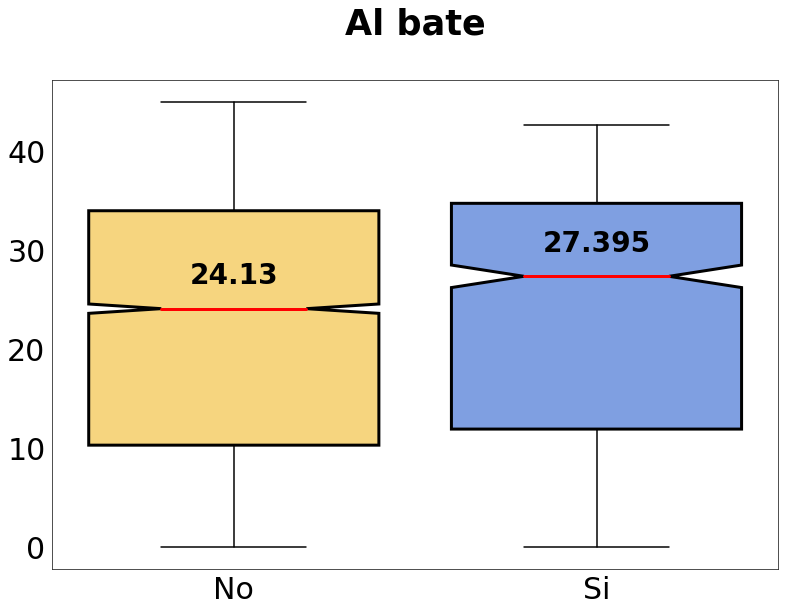

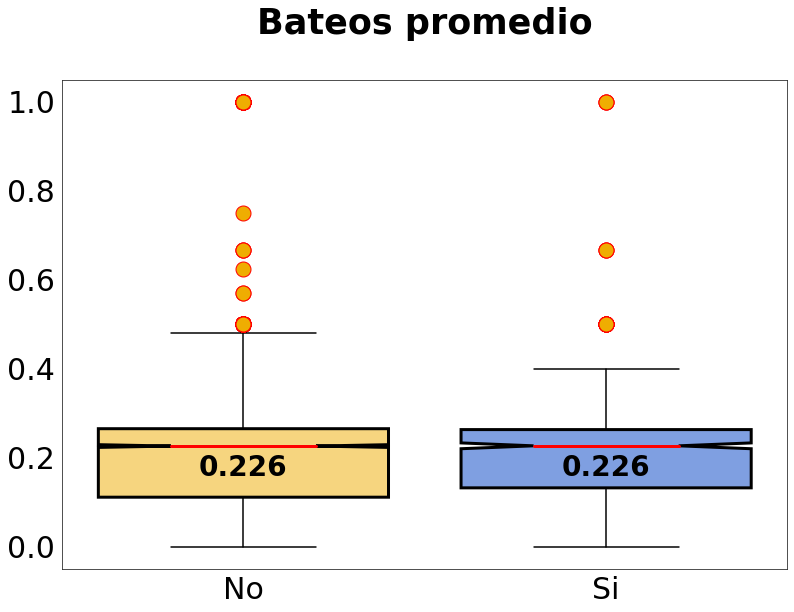

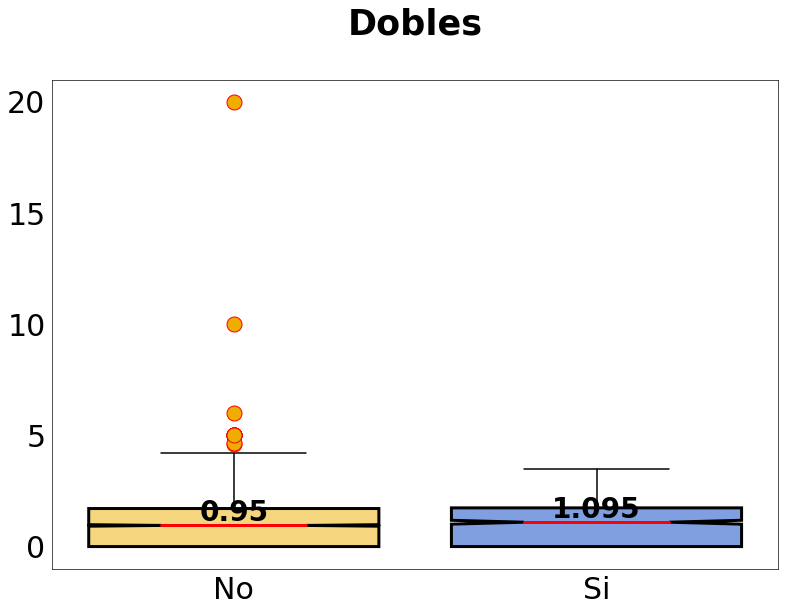

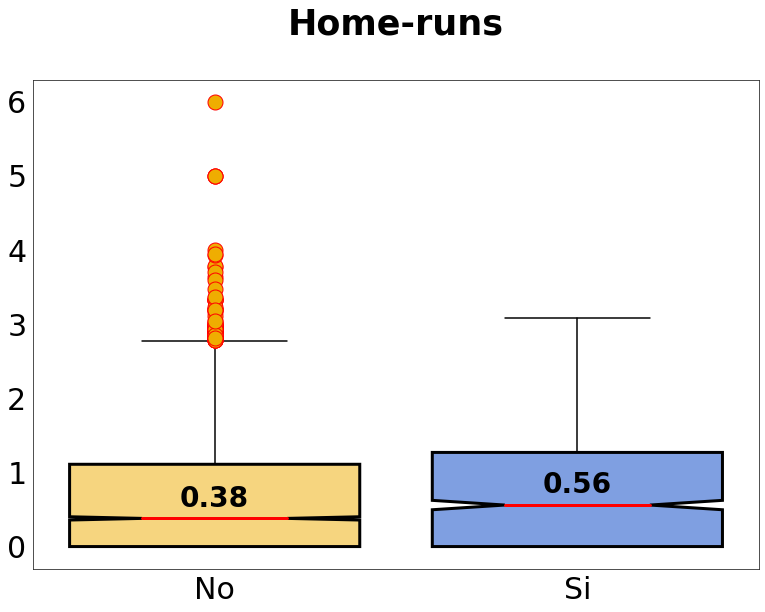

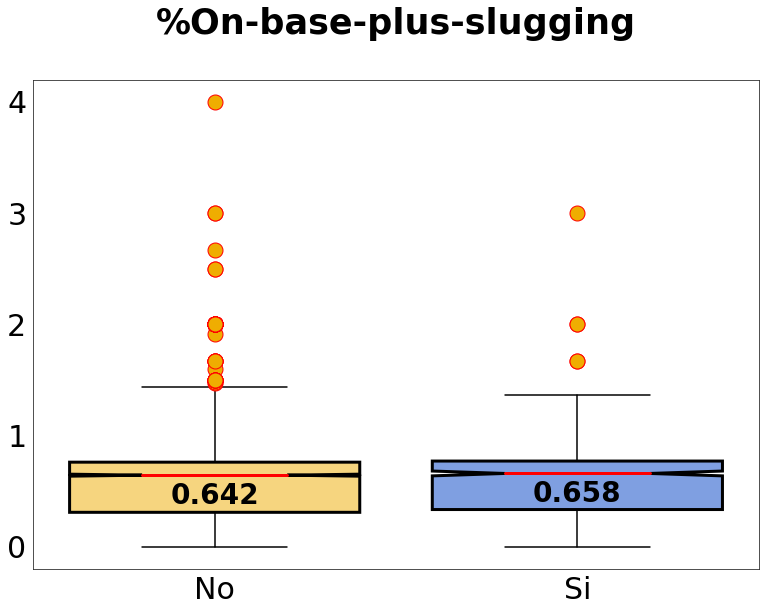

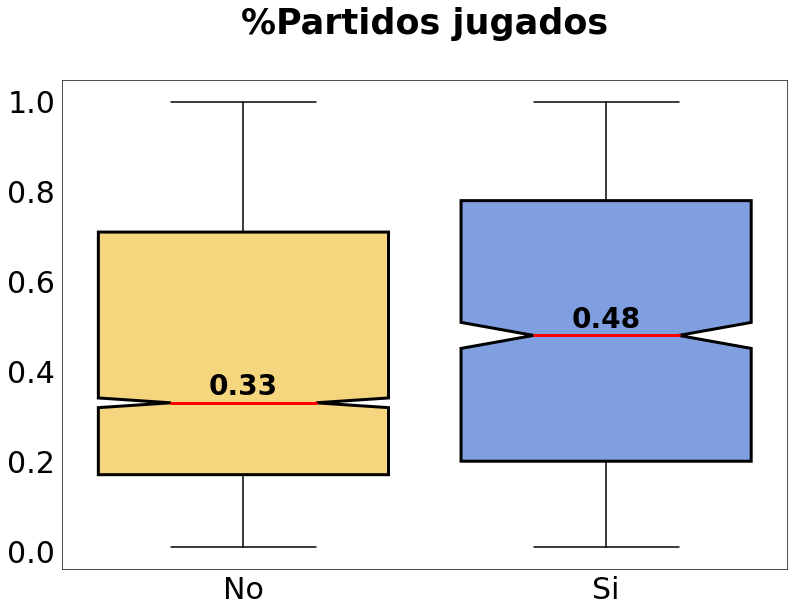

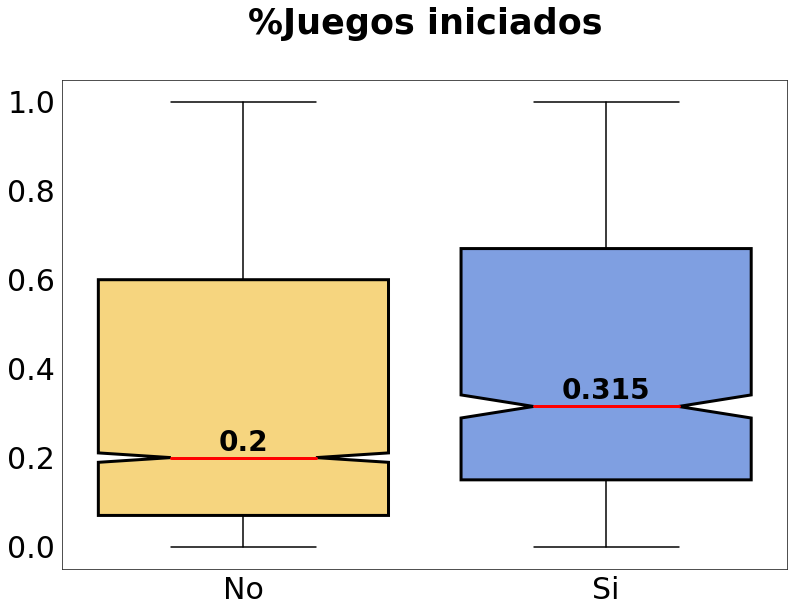

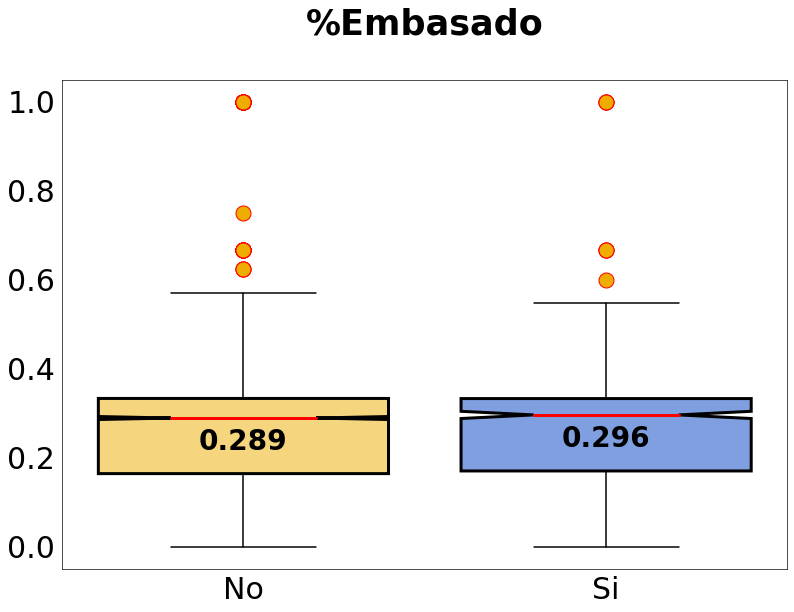

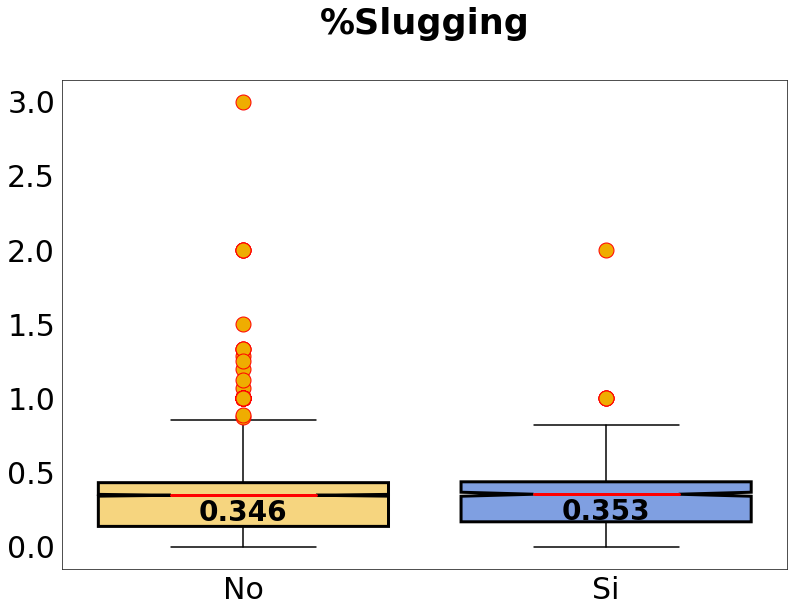

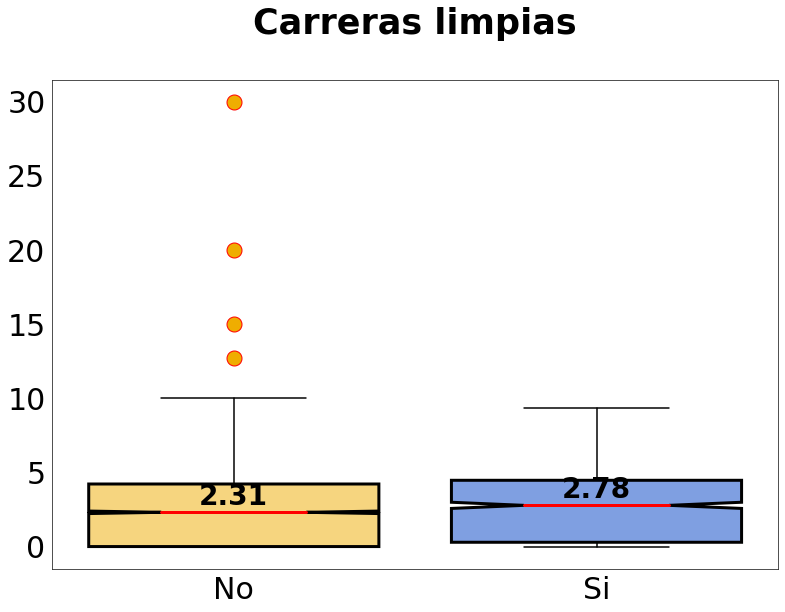

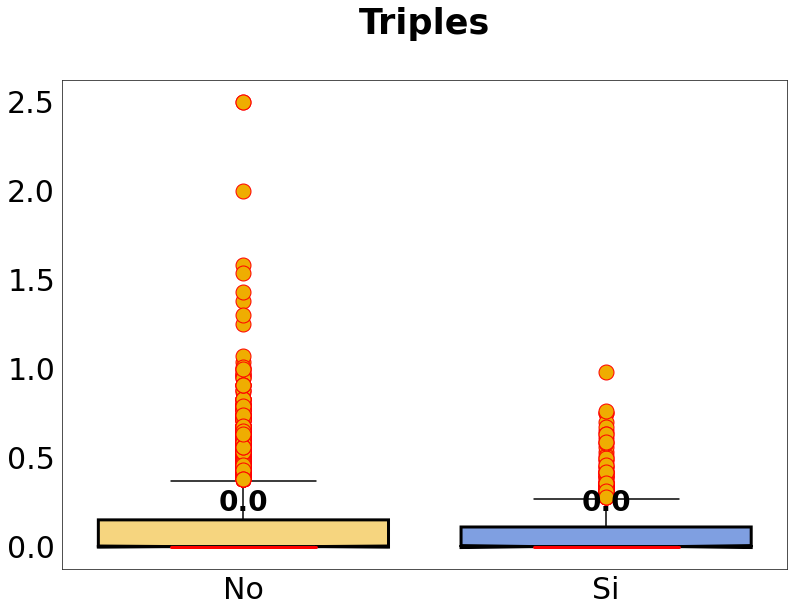

In [16]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_1 = sns.boxplot(x = 'agente_libre',
                      y = hitter_statistics[i],
                      data = df_panel_hitter, 
                      notch = True, 
                      **kws_1)
    g_1.set_title(hitter_labels[i] + '\n',
                  fontsize = 35,
                  fontweight = 'bold',
                  color = 'black')
    g_1.set_ylabel(hitter_labels[i],
                   fontsize = 26,
                   fontweight = 'bold',
                   color = 'black')
    g_1.set_xlabel('Agentes libres',
                   fontsize = 18,
                   fontweight = 'bold',
                   color = 'black')  
    g_1.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_1.set(xlabel = None)
    g_1.set(ylabel = None)
    """g_1.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.4)"""

    mybox = g_1.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_hitter.groupby(['agente_libre'])[hitter_statistics[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_hitter[hitter_statistics[i]].median()

    for xtick in g_1.get_xticks():
        g_1.text(xtick,
                 medians[xtick] + vertical_offset*hitter_positions[i]
                 + hitter_positions_adjustment[i],
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Boxplot/Per_10_Games/boxplot_hitter_" + str(hitter_labels_save[i]).lower() + ".pdf",
                format = "pdf")

IndexError: list index out of range

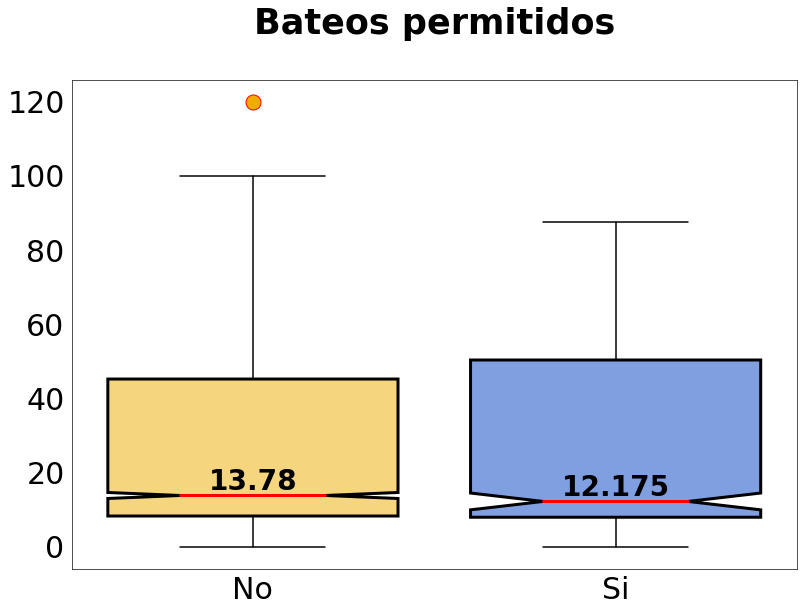

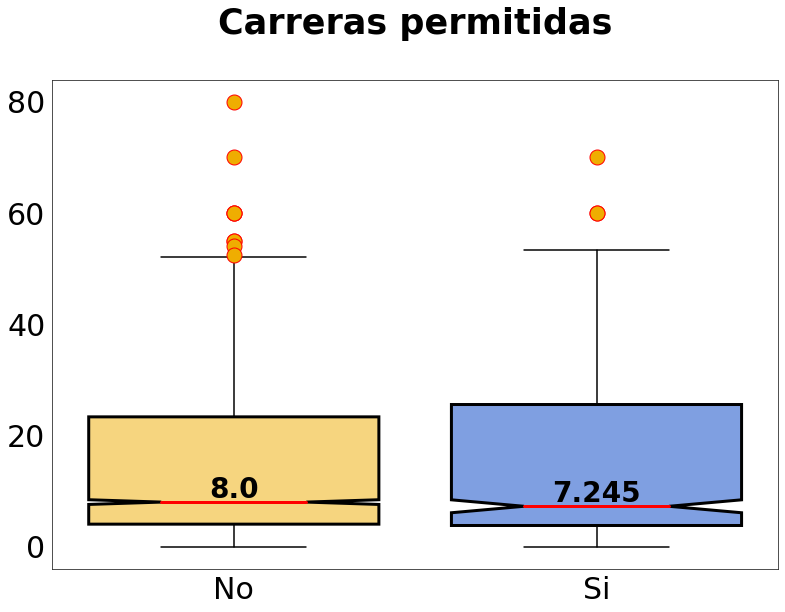

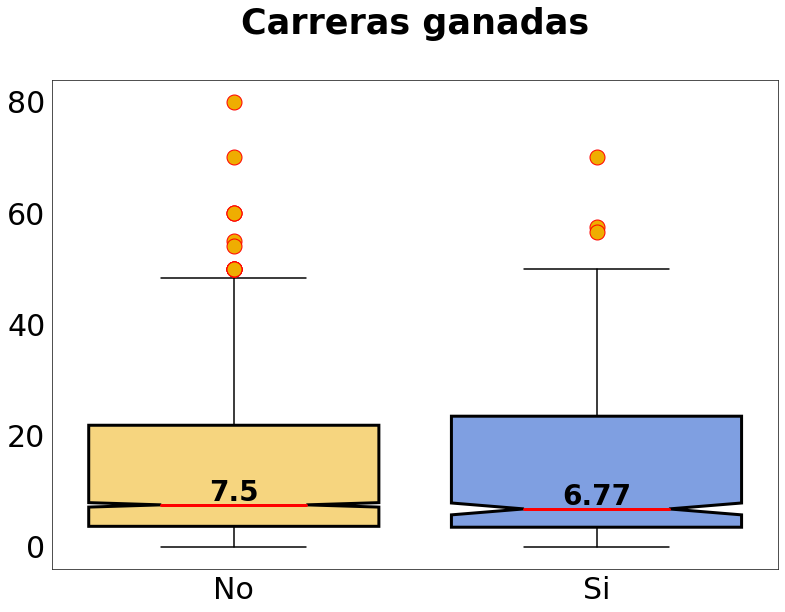

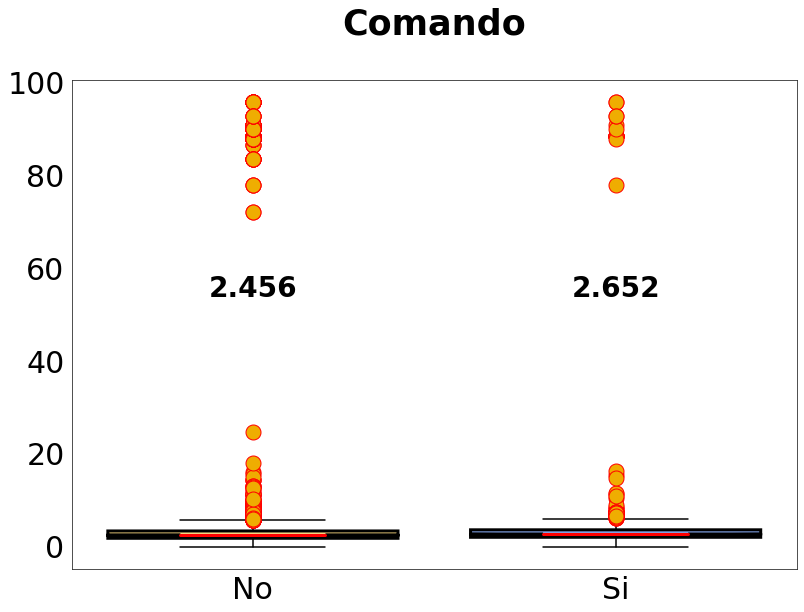

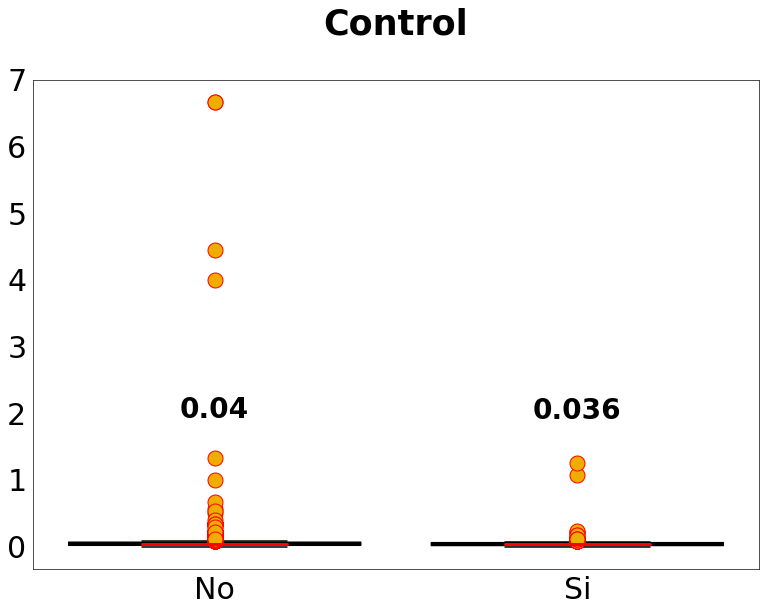

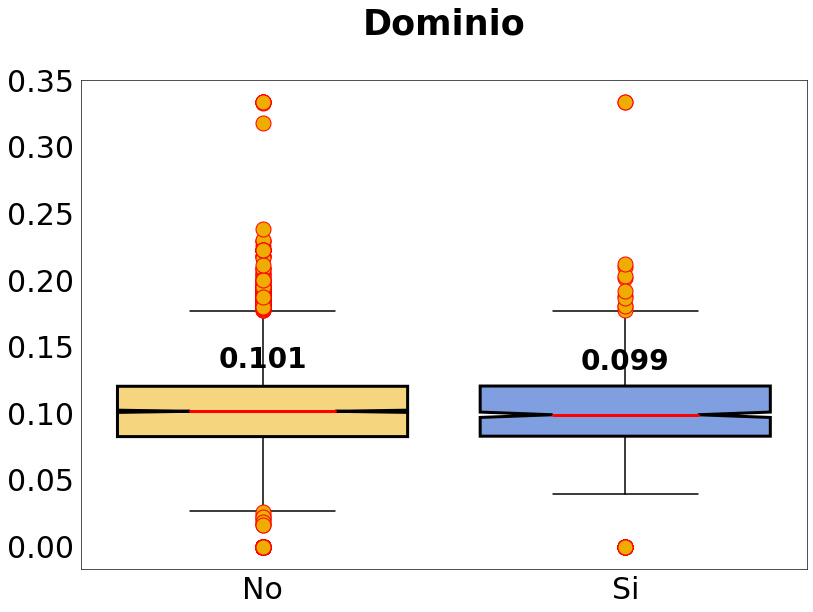

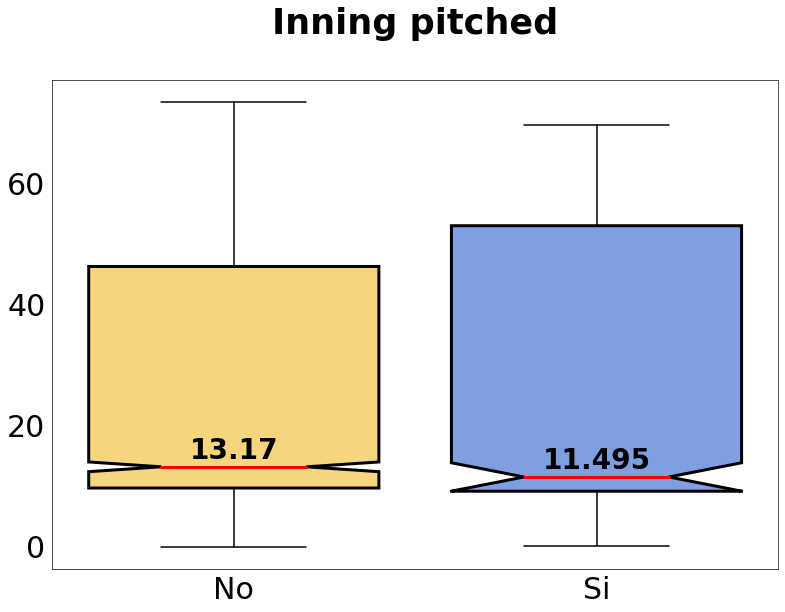

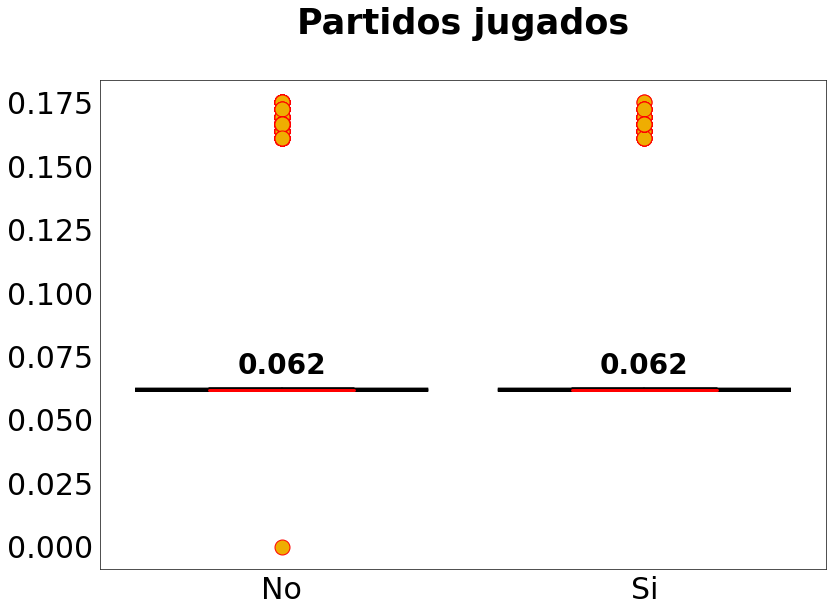

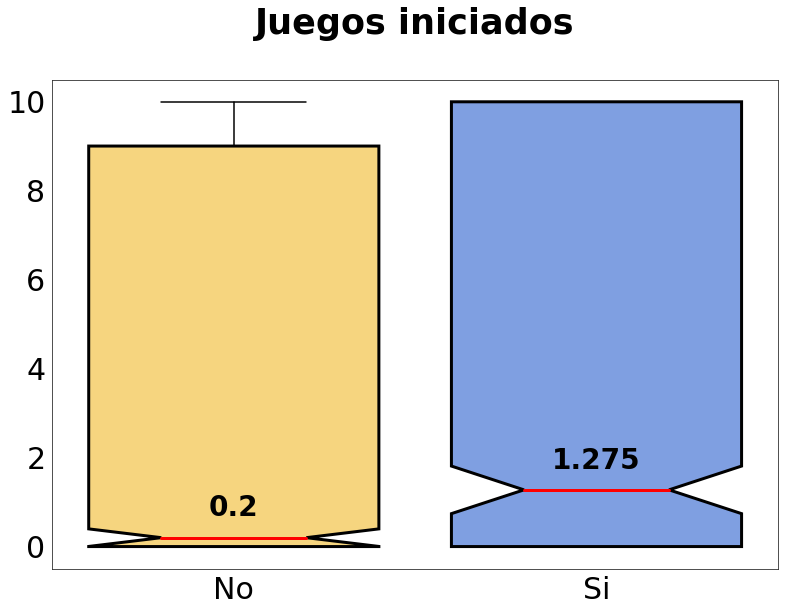

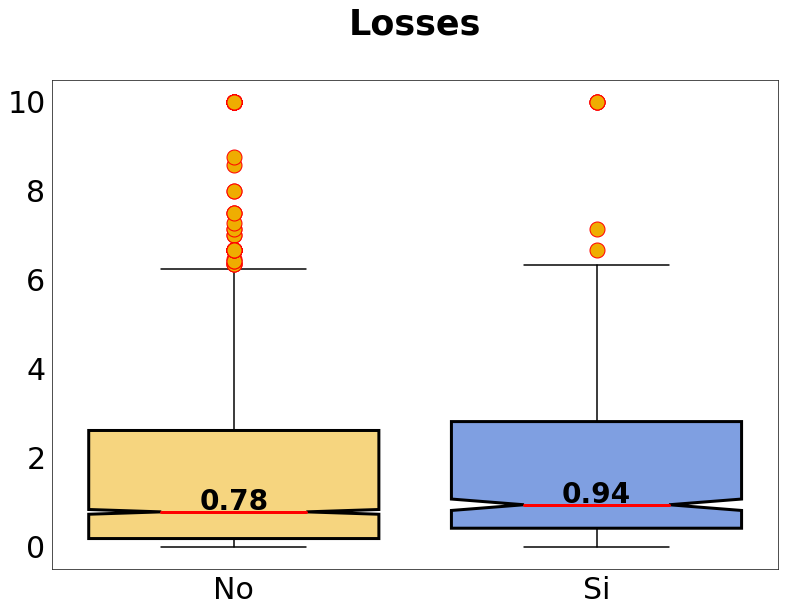

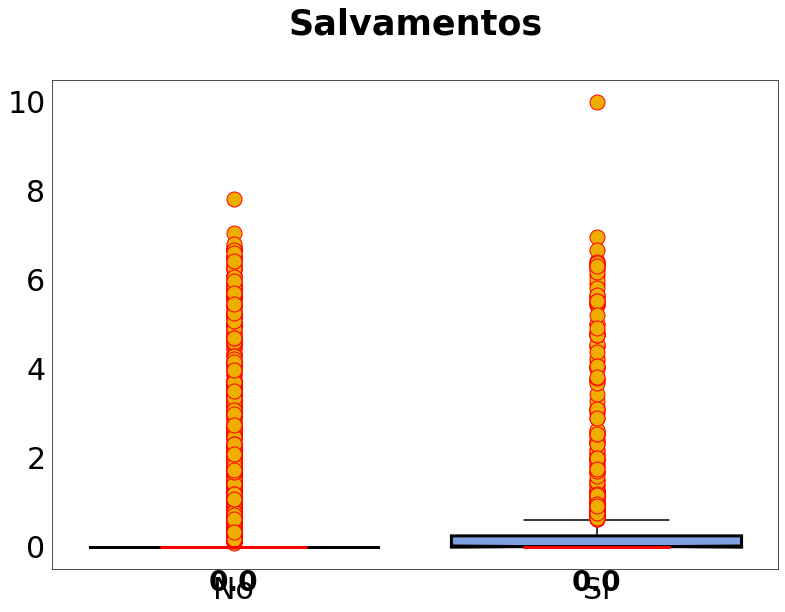

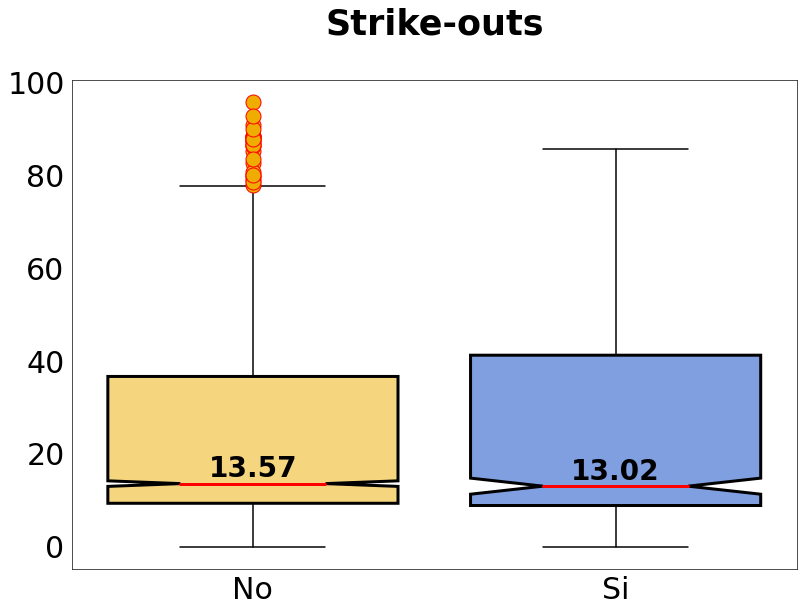

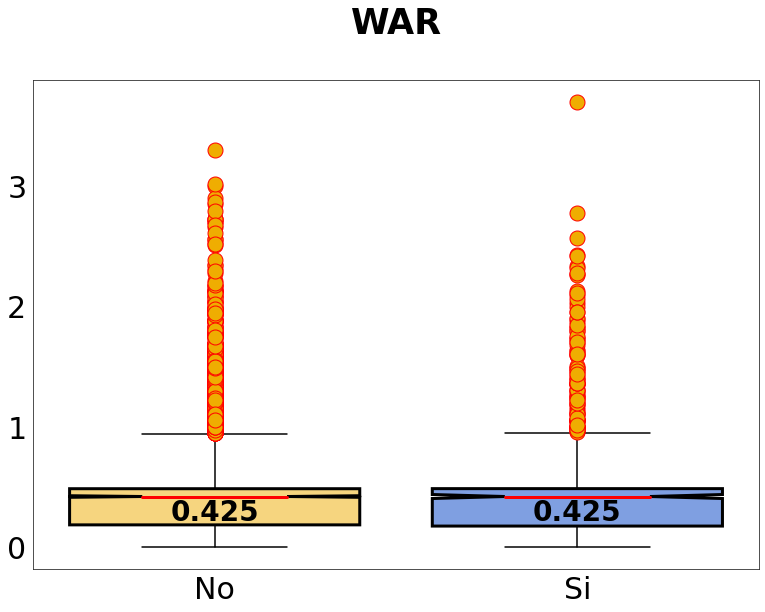

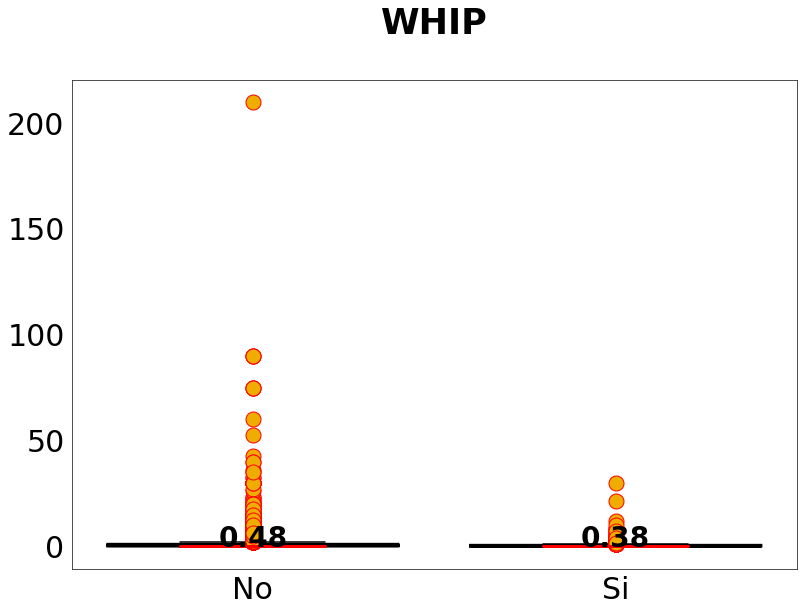

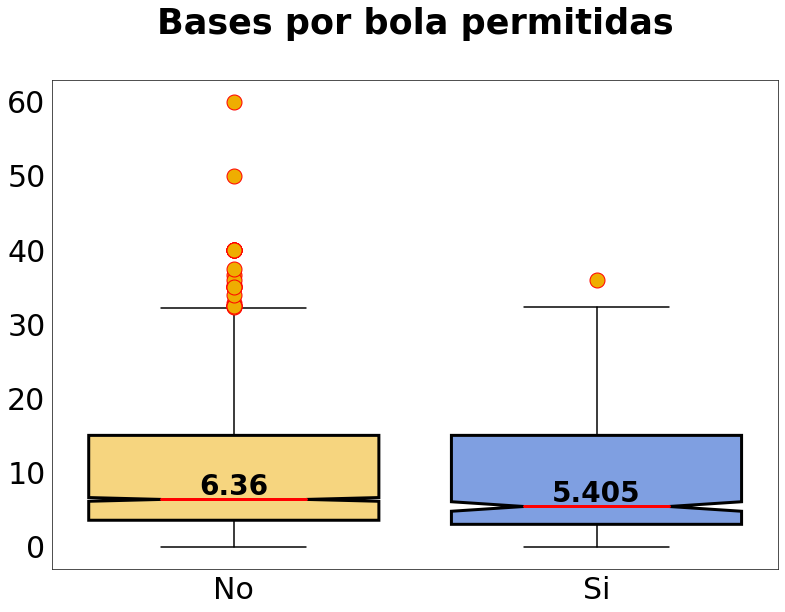

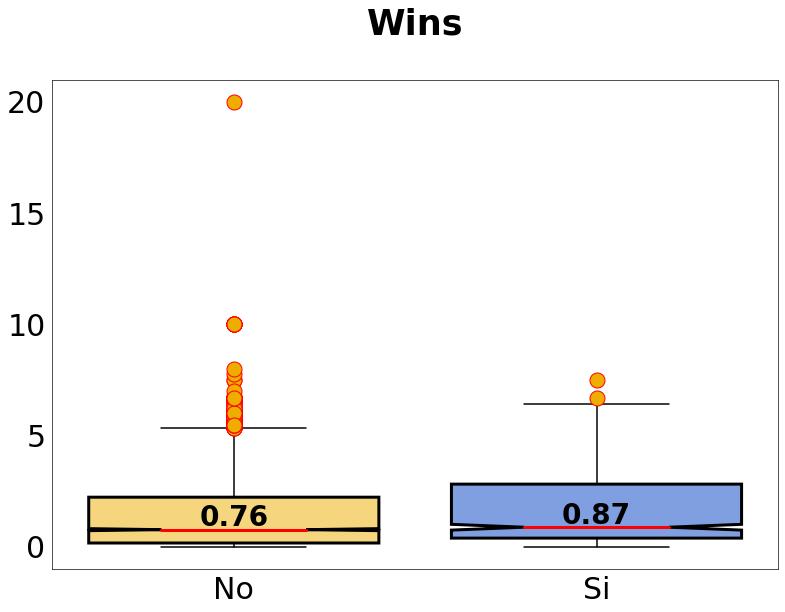

In [17]:
for i in range(0,len(pitcher_statistics)):
    print(str())
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_1 = sns.boxplot(x = 'agente_libre',
                      y = pitcher_statistics[i],
                      data = df_panel_pitcher, 
                      notch = True, 
                      **kws_1)
    g_1.set_title(pitcher_labels[i] + '\n',
                  fontsize = 35,
                  fontweight = 'bold',
                  color = 'black')
    g_1.set_ylabel(pitcher_labels[i],
                   fontsize = 26,
                   fontweight = 'bold',
                   color = 'black')
    g_1.set_xlabel('Agentes libres',
                   fontsize = 19,
                   fontweight = 'bold',
                   color = 'black')  
    g_1.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_1.set(xlabel = None)
    g_1.set(ylabel = None)
    """g_1.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.8)"""

    mybox = g_1.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_pitcher.groupby(['agente_libre'])[pitcher_statistics[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_pitcher[pitcher_statistics[i]].median()

    for xtick in g_1.get_xticks():
        g_1.text(xtick,
                 medians[xtick] + vertical_offset*pitcher_positions[i] + pitcher_positions_adjustment[i],
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Boxplot/Per_10_Games/boxplot_pitcher_" + str(pitcher_labels_save[i]).lower() + ".pdf",
                format = "pdf")

## Series de tiempo

Grafiquemos los promedios a lo largo de las temporadas

In [ ]:
temporadas = [str(year) for year in range(2012,2023)]

In [ ]:
mean_panel_hitter = df_panel_hitter.groupby(['agente_libre','anio']).mean()
mean_panel_hitter.reset_index(inplace = True)
mean_panel_pitcher = df_panel_pitcher.groupby(['agente_libre','anio']).mean()
mean_panel_pitcher.reset_index(inplace = True)

In [ ]:
mean_panel_hitter[mean_panel_hitter['anio'] >= 2018].head()

In [ ]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    # Bases de datos
    mean_hitter_fa = mean_panel_hitter[(mean_panel_hitter['agente_libre'] == 'Si') & (mean_panel_hitter['anio'] > 2011)][hitter_statistics[i]]
    mean_hitter_no = mean_panel_hitter[(mean_panel_hitter['agente_libre'] == 'No') & (mean_panel_hitter['anio'] > 2011)][hitter_statistics[i]]
    # Máximos
    max_hitter = mean_panel_hitter[hitter_statistics[i]].max()
    # Mínimos
    min_hitter = mean_panel_hitter[hitter_statistics[i]].min()
    # Bases normalizadas
    normalized_fa = (mean_hitter_fa - min_hitter)/(max_hitter - min_hitter)
    normalized_no = (mean_hitter_no - min_hitter)/(max_hitter - min_hitter)
    
    axes.plot(temporadas,
              normalized_fa,
              color = (0/255,64/255,196/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'o',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'Agente libre')
    axes.plot(temporadas,
              normalized_no,
              color = (239/255,173/255,1/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'D',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'No-agente libre')
    axes.set_title(hitter_labels[i] + '\n',
                   fontsize = 35,
                   fontweight = 'bold',
                   color = 'black')
    axes.set_xlabel('Temporadas',
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.set_ylabel(hitter_labels[i], 
                    fontsize = 26,
                    color = 'black',
                    fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    axes.tick_params(axis = 'x',
                     labelrotation = 90)
    legend = plt.legend(loc = 'best', 
                    labelcolor = 'black', 
                    fontsize = 30,
                    facecolor = 'white',
                    framealpha = 0.3,
                    fancybox = True,
                    frameon = True)
    axes.set(xlabel = None)
    axes.set(ylabel = None)
    axes.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Line_plot/Per_10_Games/plot_hitter_" + str(hitter_labels_save[i]).lower() + ".pdf",
                format = "pdf")

In [ ]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    # Bases de datos
    mean_pitcher_fa = mean_panel_pitcher[(mean_panel_pitcher['agente_libre'] == 'Si') & (mean_panel_pitcher['anio'] > 2011)][pitcher_statistics[i]]
    mean_pitcher_no = mean_panel_pitcher[(mean_panel_pitcher['agente_libre'] == 'No') & (mean_panel_pitcher['anio'] > 2011)][pitcher_statistics[i]]
    # Máximos
    max_pitcher = mean_panel_pitcher[pitcher_statistics[i]].max()
    # Mínimos
    min_pitcher = mean_panel_pitcher[pitcher_statistics[i]].min()
    # Bases normalizadas
    normalized_fa = (mean_pitcher_fa - min_pitcher)/(max_pitcher - min_pitcher)
    normalized_no = (mean_pitcher_no - min_pitcher)/(max_pitcher - min_pitcher)
    
    axes.plot(temporadas,
              normalized_fa,
              color = (0/255,64/255,196/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'o',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'Agente libre')
    axes.plot(temporadas,
              normalized_no,
              color = (239/255,173/255,1/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'D',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'No-agente libre')
    axes.set_title(pitcher_labels[i] + '\n',
                   fontsize = 35,
                   fontweight = 'bold',
                   color = 'black')
    axes.set_xlabel('Temporadas',
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.set_ylabel(pitcher_labels[i], 
                    fontsize = 26,
                    color = 'black',
                    fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    axes.tick_params(axis = 'x',
                     labelrotation = 90)
    legend = plt.legend(loc = 'best', 
                    labelcolor = 'black',
                    fontsize = 30,
                    facecolor = 'white',
                    framealpha = 0.3,
                    fancybox = True,
                    frameon = True)
    axes.set(xlabel = None)
    axes.set(ylabel = None)
    axes.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Line_plot/Per_10_Games/plot_pitcher_" + str(pitcher_labels_save[i]).lower() + ".pdf",
                format = "pdf")

## Diagramas de densidad

Primero, calcularemos los ancho de ventana óptimas

In [ ]:
# Agentes libres
fa_pitcher_binwidth = [0]*len(pitcher_statistics)
fa_hitter_binwidth = [0]*len(hitter_statistics)
# Mo agentes libres
no_pitcher_binwidth = [0]*len(pitcher_statistics)
no_hitter_binwidth = [0]*len(hitter_statistics)

# Pitchers dataframes
fa_pitcher = mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'Si']
no_pitcher = mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'No']
# Filtered dataframes
fa_hitter = mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'Si']
no_hitter = mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'No']

In [ ]:
# Pitchers:
for i in range(0,len(pitcher_statistics)):    
    # Agentes libres pitchers:
    # Obteniendo percentiles
    fa_pitcher_aux = fa_pitcher[pitcher_statistics[i]]
    P = np.percentile(fa_pitcher_aux, [10, 90])
    fa_pitcher_filtered = fa_pitcher[(fa_pitcher_aux > P[0]) & (fa_pitcher_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = fa_pitcher_filtered[pitcher_statistics[i]].std()
    q1, q3 = np.percentile(fa_pitcher_filtered[pitcher_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = fa_pitcher_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    fa_pitcher_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda
    
    # No-agentes libres pitchers:
    # Obteniendo percentiles
    no_pitcher_aux = no_pitcher[pitcher_statistics[i]]
    P = np.percentile(no_pitcher_aux, [5, 95])
    no_pitcher_filtered = no_pitcher[(no_pitcher_aux > P[0]) & (no_pitcher_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = no_pitcher_filtered[pitcher_statistics[i]].std()
    q1, q3 = np.percentile(no_pitcher_filtered[pitcher_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = no_pitcher_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    no_pitcher_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda

# Hitters:
for i in range(0,len(hitter_statistics)): 
    # Agentes libres pitchers:
    # Obteniendo percentiles
    fa_hitter_aux = fa_hitter[hitter_statistics[i]]
    P = np.percentile(fa_hitter_aux, [10, 90])
    fa_hitter_filtered = fa_hitter[(fa_hitter_aux > P[0]) & (fa_hitter_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = fa_hitter_filtered[hitter_statistics[i]].std()
    q1, q3 = np.percentile(fa_hitter_filtered[hitter_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = fa_hitter_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    fa_hitter_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda
    
    # No-agentes libres:
    # Obteniendo percentiles
    no_hitter_aux = no_hitter[hitter_statistics[i]]
    P = np.percentile(no_hitter_aux, [10, 90])
    no_hitter_filtered = no_hitter[(no_hitter_aux > P[0]) & (no_hitter_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = no_hitter_filtered[hitter_statistics[i]].std()
    q1, q3 = np.percentile(no_hitter_filtered[hitter_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = no_hitter_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    no_hitter_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda

In [ ]:
hitter_positions = [0.1, -0.3, 0.2, 0.4, -0.4,
                    0.05, 0.08, -0.25, -0.5, 0.2,
                    1, -0.4]
hitter_positions_adjustment = [0, 0, 0, 0, 0,
                               0, 0, 0, 0, 0,
                               0.2, 0]
pitcher_positions = [0.1, 0.1, 0.1, 0.5, -3,
                    0.23, 0.1, 0.1, 2,
                    0.05, 0.08, 0.1, -0.48, -1.73,
                    0.1, 0.2]
pitcher_positions_adjustment = [0, 0, 0, 50, 2,
                                0.01, 0, 0, 0,
                                0, -1, 0, 0, 0,
                                0, 0]

In [ ]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    g = sns.distplot(mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'Si'][hitter_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (0/255,64/255,196/255,0.7),
                                 'edgecolor': (0/255,64/255,196/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "navy",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'Agente libre')
    g = sns.distplot(mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'No'][hitter_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (239/255,173/255,1/255,0.8),
                                 'edgecolor': (239/255,173/255,1/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "orange",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'No-agente libre')
    g.set_title(hitter_labels[i] + '\n',
                fontsize = 35,
                fontweight = 'bold',
                color = 'black')
    g.set_xlabel('Temporadas',
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    g.set_ylabel(hitter_labels[i], 
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    legend = plt.legend(loc = 'best', 
                        labelcolor = 'black',
                        fontsize = 30,
                        facecolor = 'white',
                        framealpha = 0.3,
                        fancybox = True,
                        frameon = True)
    g.set(xlabel = None)
    g.set(ylabel = None)
    g.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Density_plot/Per_10_Games/density_hitter_" + str(hitter_labels_save[i]).lower() + ".pdf",
                format = "pdf")

In [ ]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    g = sns.distplot(mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'Si'][pitcher_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (0/255,64/255,196/255,0.7),
                                 'edgecolor': (0/255,64/255,196/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "navy",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'Agente libre')
    g = sns.distplot(mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'No'][pitcher_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (239/255,173/255,1/255,0.8),
                                 'edgecolor': (239/255,173/255,1/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "orange",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'No-agente libre')
    g.set_title(pitcher_labels[i] + '\n',
                fontsize = 35,
                fontweight = 'bold',
                color = 'black')
    g.set_xlabel('Temporadas',
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    g.set_ylabel(pitcher_labels[i], 
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    legend = plt.legend(loc = 'best', 
                        labelcolor = 'black',
                        fontsize = 30,
                        facecolor = 'white',
                        framealpha = 0.3,
                        fancybox = True,
                        frameon = True)
    g.set(xlabel = None)
    g.set(ylabel = None)
    g.patch.set_facecolor('white')
    
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Density_plot/Per_10_Games/density_pitcher_" + str(pitcher_labels_save[i]).lower() + ".pdf",
                format = "pdf")